# Bienes Raizes Análisis de Regresión
## Evaluación con Pruebas de Hipótesis
Katlyn Goeujon-Mackness <br>
21/03/2025

## Objetivo
 Vamos a realizar un análisis de pruebas de hipótesis para un modelo de regresión lineal múltiple mediante matrices de manera que puedas establecer qué variables son adecuadas en un proceso predictivo.

## Los Datos
Proporcionados por Kaggle, estos datos representan casas vendidas en una ciudad de Estados Unidos. Incluyen variables que explican diversos aspectos de las propiedades, tales como tamaño, número de habitaciones, ubicación y características adicionales. El propósito de este conjunto de datos es facilitar el análisis y la predicción de los precios de las casas.

### Preparar la Base de Datos

In [185]:
# Importar librerías
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [186]:
# Cargar los datos
data = pd.read_csv('Data/kc_house_data.csv')

#### Exploración

In [187]:
# Obtener una vista previa
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [189]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Observaciones
- Conjunto de datos suficiente grande para un análisis
- Valores no nulos en todos las variables.
- Hay algunas variables categóricas que pueden necesitar ser procesadas.
- Algunas variables podria ser altamente correlacionadas.

### Definición de Modelo de Regresión Lineal Múltiple

In [190]:
# Crear una columna de intercepto
data["Intercepto"] = 1

# Seleccionar variables independientes adecuadas
X = data[["Intercepto", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]]

# Seleccionar la variable dependiente
y = data['price'].values


In [191]:
# Codificar las variables categóricas
#X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)

In [192]:
X.head()

,Intercepto,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,1,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,1,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,1,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,1,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [193]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      shape=(21613,))

### Modelado de Manera Matricial

In [194]:
X = np.array(X)
y = np.array(y)

# Calcular la transpuesta de X
XT_X = np.matmul(np.matrix.transpose(X), X)

# Convertir la matriz XT_X a tipo float64
XT_X = XT_X.astype(np.float64)

# Calcular la inversa de la matriz XT_X
XT_X_inv = np.linalg.pinv(XT_X)

# Calcular el producto de la transpuesta de X y Y
XT_Y = np.matmul(np.matrix.transpose(X), y)

### Coeficientes de regresión

In [195]:
# Calcular los coeficientes de regresión (betas)
betas = np.matmul(XT_X_inv, XT_Y)
betas


array([ 6.19281842e+06, -3.87952330e+04,  4.57012292e+04,  8.58167208e+01,
       -2.55617107e-01,  2.43661021e+04,  5.74023508e+05,  4.52026605e+04,
        1.88098629e+04,  1.24387004e+05,  8.42494389e+01,  8.58704925e+01,
       -3.57053246e+03,  8.58283045e+00])

In [196]:
# Cálculos de los pronósticos para Y de acuerdo a los coeficientes de regresión
Y_pred = np.matmul(X, betas)

# Cálculo de residuales
Resid = y - Y_pred
Resid

array([ -70581.54709037, -103978.17188677,  -34602.43018932, ...,
        276803.60981721,   -7092.01673261,  196062.03827211],
      shape=(21613,))

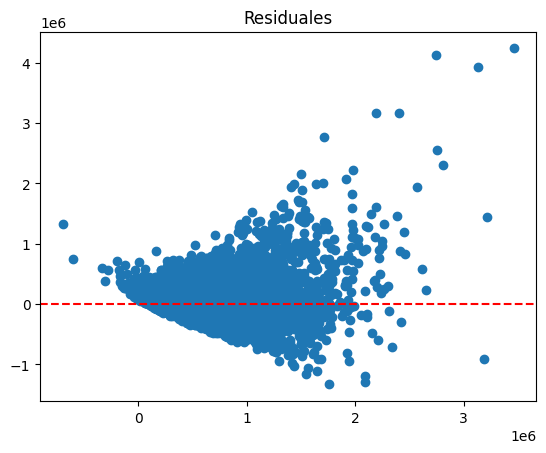

In [197]:
# Visualizar residuales

plt.scatter(Y_pred, Resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuales')
plt.show()


Comentario: Este gráfico de los residuales muestra heterocedasticidad.

In [198]:
# Utilizar pruba Breuch-Pagan para confirmar la heterocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value, _, _ = het_breuschpagan(Resid, X)
print("Breusch-Pagan Test p-value:", p_value)
if p_value < 0.05:
    print("Heterocedasticidad es confirmado.")
else:
    print("No hay heterocedasticidad.")


Breusch-Pagan Test p-value: 0.0
Heterocedasticidad es confirmado.


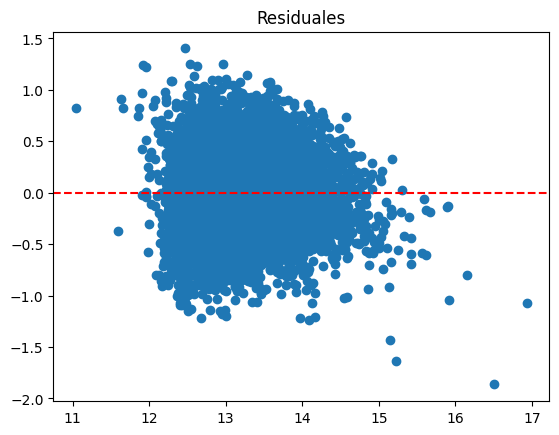

In [199]:
# Aplicar una transformación de la variable y para resolver la heterocedasticidad
y_transformed = np.log(y + 1)

X = np.array(X)
y = np.array(y_transformed)

# Calcular la transpuesta de X
XT_X = np.matmul(np.matrix.transpose(X), X)

# Convertir la matriz XT_X a tipo float64
XT_X = XT_X.astype(np.float64)

# Calcular la inversa de la matriz XT_X
XT_X_inv = np.linalg.pinv(XT_X)

# Calcular el producto de la transpuesta de X y Y
XT_Y = np.matmul(np.matrix.transpose(X), y_transformed)

# Calcular los coeficientes de regresión (betas)
betas = np.matmul(XT_X_inv, XT_Y)

# Cálculos de los pronósticos para Y de acuerdo a los coeficientes de regresión
Y_pred = np.matmul(X, betas)

# Cálculo de residuales
Resid = y_transformed - Y_pred

# Visualizar residuales

plt.scatter(Y_pred, Resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuales')
plt.show()

Comentario: El gráfico de residuales indica un modelo de regresión adecuado.

### Validar el modelo

In [200]:
y = y_transformed

# Evaluación con RSS, TSS y ESS
RSS = float(np.matmul(np.matrix.transpose(Resid), Resid))
TSS = float(np.matmul(np.matrix.transpose(y), y) - len(y)*(y.mean()**2))
ESS = TSS - RSS
print("RSS:", RSS)
print("TSS:", TSS)
print("ESS:", ESS)

RSS: 2117.942514851498
TSS: 5995.06803983869
ESS: 3877.1255249871924


In [201]:
# Cálculo del coeficiente de determinación R^2
R_cuad = float(1-(RSS/TSS))
R_cuad

0.6467191863749915

In [202]:
# Cálculo del coeficiente de determinación ajustado R^2
RSqAj = float(1 - (RSS / (X.shape[0] - X.shape[1])) / (TSS / (X.shape[0] - 1)))
RSqAj

0.6465065538189877

### Pruebas de Hipótesis

#### Criterio 1: t-statistic

In [203]:
# Cálculo de la varianza del error de regresión
s_cuad = RSS / (len(y) - X.shape[1])
s_cuad

0.09805743390210185

In [204]:
# Desviación estándar de los errores de regresión
s = math.sqrt(s_cuad)
s

0.31314123634887475

In [205]:
# Cálculo de las t-stats para cada coeficiente de regresión
result_t = []
for i in range(0, X.shape[1]):
    t = float(betas[i] / (s * math.sqrt(XT_X_inv[i][i])))
    result_t.append(t)

In [206]:
grados_libertad = len(y) - X.shape[1]
# La t_critica se obtendrá a un nivel de confianza del 95% (Alfa = 5%)
t_critico = abs(scipy.stats.t.ppf(q=0.025, df = grados_libertad))
t_critico

np.float64(1.9600738230470713)

In [207]:
for i in range(0, X.shape[1]):
    if (abs(result_t[i])) > t_critico:
        print("Beta", i, "es significativa") # Aquí se rechaza H0
    else:
        print("Beta", i, "NO es significativa") # Aquí NO se rechaza H0

Beta 0 es significativa
Beta 1 es significativa
Beta 2 es significativa
Beta 3 es significativa
Beta 4 NO es significativa
Beta 5 es significativa
Beta 6 es significativa
Beta 7 es significativa
Beta 8 es significativa
Beta 9 es significativa
Beta 10 es significativa
Beta 11 es significativa
Beta 12 es significativa
Beta 13 NO es significativa


#### Critero 2: Valor p

In [208]:
# Cálculo de valores p
for i in range(0, X.shape[1]):
    print("Valor p de Beta", i, ":", scipy.stats.t.sf(abs(result_t[i]), df = grados_libertad))

Valor p de Beta 0 : 0.0
Valor p de Beta 1 : 1.3767290062393716e-14
Valor p de Beta 2 : 9.177686445997185e-50
Valor p de Beta 3 : 1.948634675608377e-13
Valor p de Beta 4 : 0.3485789463198794
Valor p de Beta 5 : 6.497784970273298e-83
Valor p de Beta 6 : 5.298160248609331e-35
Valor p de Beta 7 : 1.0605377996103193e-47
Valor p de Beta 8 : 6.58357277452974e-30
Valor p de Beta 9 : 0.0
Valor p de Beta 10 : 0.0
Valor p de Beta 11 : 0.0
Valor p de Beta 12 : 0.0
Valor p de Beta 13 : 0.046722716329249875


Comentario: Valores p son extremamente pequeños, lo que sugiere significancia.

#### Criterio 3: Intervales de confianza

In [209]:
for i in range(0, X.shape[1]):
    print("El valor de Beta", i, "se encuentra entre", 
          float(betas[i]) - t_critico * s * math.sqrt(XT_X_inv[i][i]),
          "y", t_critico * s * math.sqrt(XT_X_inv[i][i]))

El valor de Beta 0 se encuentra entre 20.741325449725394 y 0.392186889538296
El valor de Beta 1 se encuentra entre -0.028088700717469064 y 0.005750160395998418
El valor de Beta 2 se encuentra entre 0.06502711438957781 y 0.009909342159461765
El valor de Beta 3 se encuentra entre 1.7840590795484968e-05 y 6.593519675886928e-06
El valor de Beta 4 se encuentra entre -1.2446732005416407e-07 y 1.0384858633594244e-07
El valor de Beta 5 se encuentra entre 0.09396562766911845 y 0.010598827102998282
El valor de Beta 6 se encuentra entre 0.2793230607715949 y 0.05290362273526542
El valor de Beta 7 se encuentra entre 0.04092659673391766 y 0.0063987570563104074
El valor de Beta 8 se encuentra entre 0.03383593369126815 y 0.007088238869112457
El valor de Beta 9 se encuentra entre 0.22142056944372757 y 0.0061401673478606094
El valor de Beta 10 se encuentra entre 0.00011806943646744713 y 6.267186902189221e-06
El valor de Beta 11 se encuentra entre 0.00017997904193882904 y 7.772077039040064e-06
El valor d

Comentario: Algunos intervalos contienen 0, lo que indica que no son significativos para esta regresión.

In [210]:
# Comparación de resultados contra reporte automatizado
import statsmodels.api as sm

regressor = sm.OLS(y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3295.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:39:30   Log-Likelihood:                -5565.6
No. Observations:               21613   AIC:                         1.116e+04
Df Residuals:                   21600   BIC:                         1.126e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1335      0.200    105.624      0.0

### Eligir las Variables Más Relevantes
Utilizar el proceso Stepwise Backward Elimination.

In [211]:
# Convertir X en un DataFrame
X_df = pd.DataFrame(X)

# Analizar la multicolinealidad en modelos de regresión lineal múltiple
correlaciones = X_df.corr()
correlaciones

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841
2,NaN,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739
3,NaN,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363
4,NaN,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644
5,NaN,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338
6,NaN,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885
7,NaN,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917
8,NaN,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618
9,NaN,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414


<Axes: >

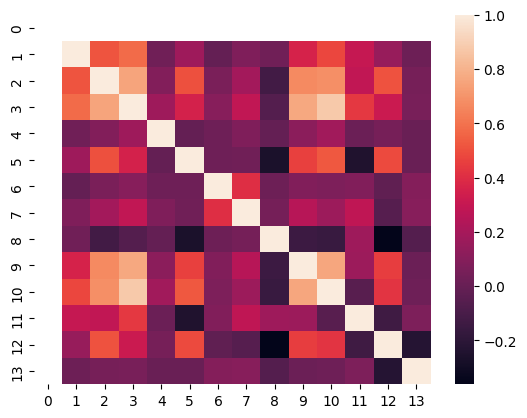

In [212]:
sns.heatmap(correlaciones)

In [213]:
# Eliminar variables menos relevantes para el análisis
X_Nueva = np.delete(X, [3, 12], axis=1)

## Reevaluación del Modelo 

In [219]:
# Ajustar el modelo de nuevo con el nuevo X
X = X_Nueva

X = np.array(X)
y = np.array(y_transformed)

# Calcular la transpuesta de X
XT_X = np.matmul(np.matrix.transpose(X), X)

# Convertir la matriz XT_X a tipo float64
XT_X = XT_X.astype(np.float64)

# Calcular la inversa de la matriz XT_X
XT_X_inv = np.linalg.pinv(XT_X)

# Calcular el producto de la transpuesta de X y Y
XT_Y = np.matmul(np.matrix.transpose(X), y_transformed)

# Calcular los coeficientes de regresión (betas)
betas = np.matmul(XT_X_inv, XT_Y)

# Cálculos de los pronósticos para Y de acuerdo a los coeficientes de regresión
Y_pred = np.matmul(X, betas)

# Cálculo de residuales
Resid = y_transformed - Y_pred

In [220]:
# Evaluación con RSS, TSS y ESS
RSS = float(np.matmul(np.matrix.transpose(Resid), Resid))
TSS = float(np.matmul(np.matrix.transpose(y), y) - len(y)*(y.mean()**2))
ESS = TSS - RSS

# Cálculo del coeficiente de determinación R^2
R_cuad = float(1-(RSS/TSS))
R_cuad

0.6021799952714297

In [221]:
# Cálculo del coeficiente de determinación ajustado R^2
RSqAj = float(1 - (RSS / (X.shape[0] - X.shape[1])) / (TSS / (X.shape[0] - 1)))
RSqAj

0.6019774111293987

### Pruebas de Hipótesis

In [222]:
# Cálculo de la varianza del error de regresión
s_cuad = RSS / (len(y) - X.shape[1])

# Desviación estándar de los errores de regresión
s = math.sqrt(s_cuad)

# Cálculo de las t-stats para cada coeficiente de regresión
result_t = []
for i in range(0, X.shape[1]):
    t = float(betas[i] / (s * math.sqrt(XT_X_inv[i][i])))
    result_t.append(t)

grados_libertad = len(y) - X.shape[1]
# La t_critica se obtendrá a un nivel de confianza del 95% (Alfa = 5%)
t_critico = abs(scipy.stats.t.ppf(q=0.025, df = grados_libertad))

for i in range(0, X.shape[1]):
    if (abs(result_t[i])) > t_critico:
        print("Beta", i, "es significativa") # Aquí se rechaza H0
    else:
        print("Beta", i, "NO es significativa") # Aquí NO se rechaza H0

Beta 0 es significativa
Beta 1 es significativa
Beta 2 es significativa
Beta 3 es significativa
Beta 4 es significativa
Beta 5 es significativa
Beta 6 es significativa
Beta 7 es significativa
Beta 8 es significativa
Beta 9 es significativa
Beta 10 es significativa
Beta 11 es significativa


In [223]:
# Cálculo de valores p
for i in range(0, X.shape[1]):
    print("Valor p de Beta", i, ":", scipy.stats.t.sf(abs(result_t[i]), df = grados_libertad))

Valor p de Beta 0 : 0.0
Valor p de Beta 1 : 3.008522451469926e-06
Valor p de Beta 2 : 0.00021780793931828416
Valor p de Beta 3 : 0.023394379111148025
Valor p de Beta 4 : 1.2471098765617098e-29
Valor p de Beta 5 : 3.3579028405446956e-28
Valor p de Beta 6 : 1.2539724198997311e-82
Valor p de Beta 7 : 8.62248357672964e-156
Valor p de Beta 8 : 0.0
Valor p de Beta 9 : 6.278896422622137e-226
Valor p de Beta 10 : 0.0
Valor p de Beta 11 : 3.602618421752492e-74


In [224]:
for i in range(0, X.shape[1]):
    print("El valor de Beta", i, "se encuentra entre", 
          float(betas[i]) - t_critico * s * math.sqrt(XT_X_inv[i][i]),
          "y", t_critico * s * math.sqrt(XT_X_inv[i][i]))

El valor de Beta 0 se encuentra entre 10.71663566518464 y 0.04932754531893078
El valor de Beta 1 se encuentra entre -0.020164138524499144 y 0.006092688150537517
El valor de Beta 2 se encuentra entre -0.027517680979134602 y 0.009845823716692244
El valor de Beta 3 se encuentra entre -2.2185848123081187e-07 y 1.101356322266416e-07
El valor de Beta 4 se encuentra entre 0.05280577079733154 y 0.011129397428593054
El valor de Beta 5 se encuentra entre 0.25786338275397985 y 0.056132217756863216
El valor de Beta 6 se encuentra entre 0.059697159077500575 y 0.006746932162438312
El valor de Beta 7 se encuentra entre 0.09080003858522966 y 0.007169560295849271
El valor de Beta 8 se encuentra entre 0.19240491144840385 y 0.006413933822296846
El valor de Beta 9 se encuentra entre 0.0001628760151031261 y 1.0469524671409813e-05
El valor de Beta 10 se encuentra entre 0.00025990448959944143 y 1.3628024444803172e-05
El valor de Beta 11 se encuentra entre 9.280497331569531e-05 y 1.116552323367065e-05


In [225]:
regressor = sm.OLS(y, X_Nueva).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2972.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:49:06   Log-Likelihood:                -6848.8
No. Observations:               21613   AIC:                         1.372e+04
Df Residuals:                   21601   BIC:                         1.382e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7660      0.025    427.795      0.0